In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
x=data.drop('output',axis=1)
y=data['output']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

#[Parallel computing n_jobs=1 default ,ther is no parallel computing,if it is -1 how many processors in the system that times parallel computing,algorithm should use all variable cores]
#[n_estimator =trees]

rf.fit(x_train,y_train)

#checking the oob score
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



### Out-of-bag(OOB) score

In [10]:
oob_score=rf.oob_score_
print(f'Out-of-Bag(OOB) score: {oob_score}')

Out-of-Bag(OOB) score: 0.8018867924528302


### Hyper parameter tuning for rando =m forest using GridSearchCV and fit the data

In [11]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)

parameters={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV

#instantiate the grid search model
grid_search=GridSearchCV(estimator=rf,
                         param_grid=parameters,
                         cv=4,
                         n_jobs=-1,
                         verbose=1,
                         scoring='accuracy')
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [12]:
grid_search.best_score_

0.8349056603773585

In [13]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

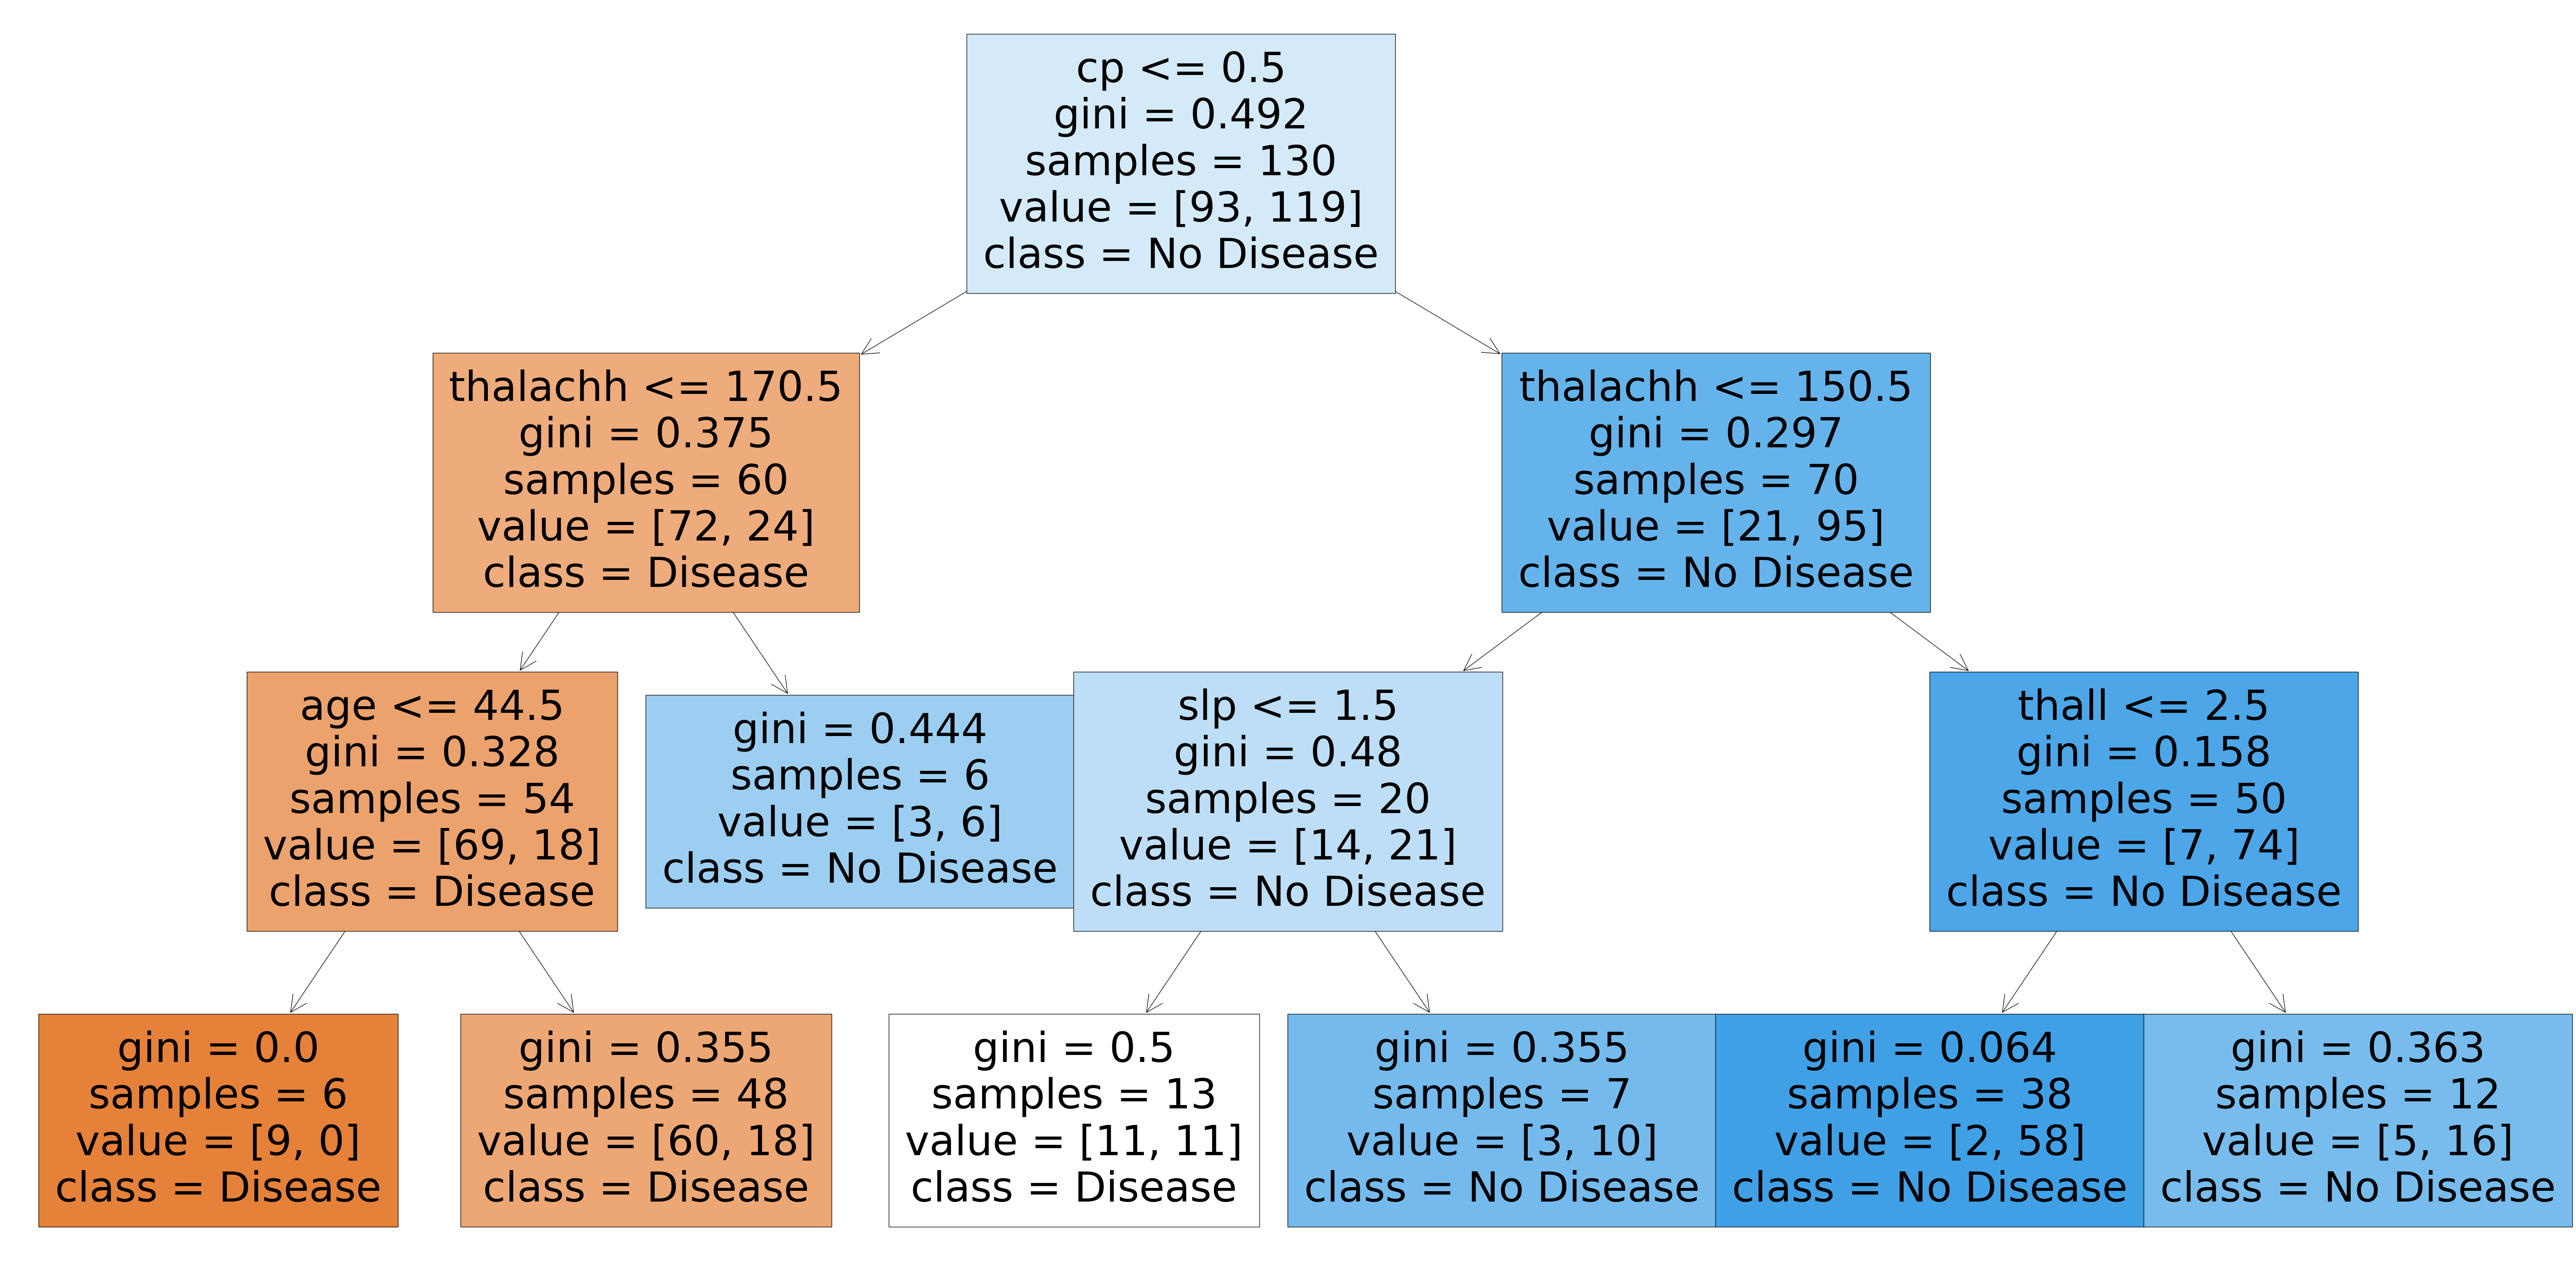

In [14]:
from  sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=x.columns.tolist(),class_names=['Disease','No Disease'],filled=True);

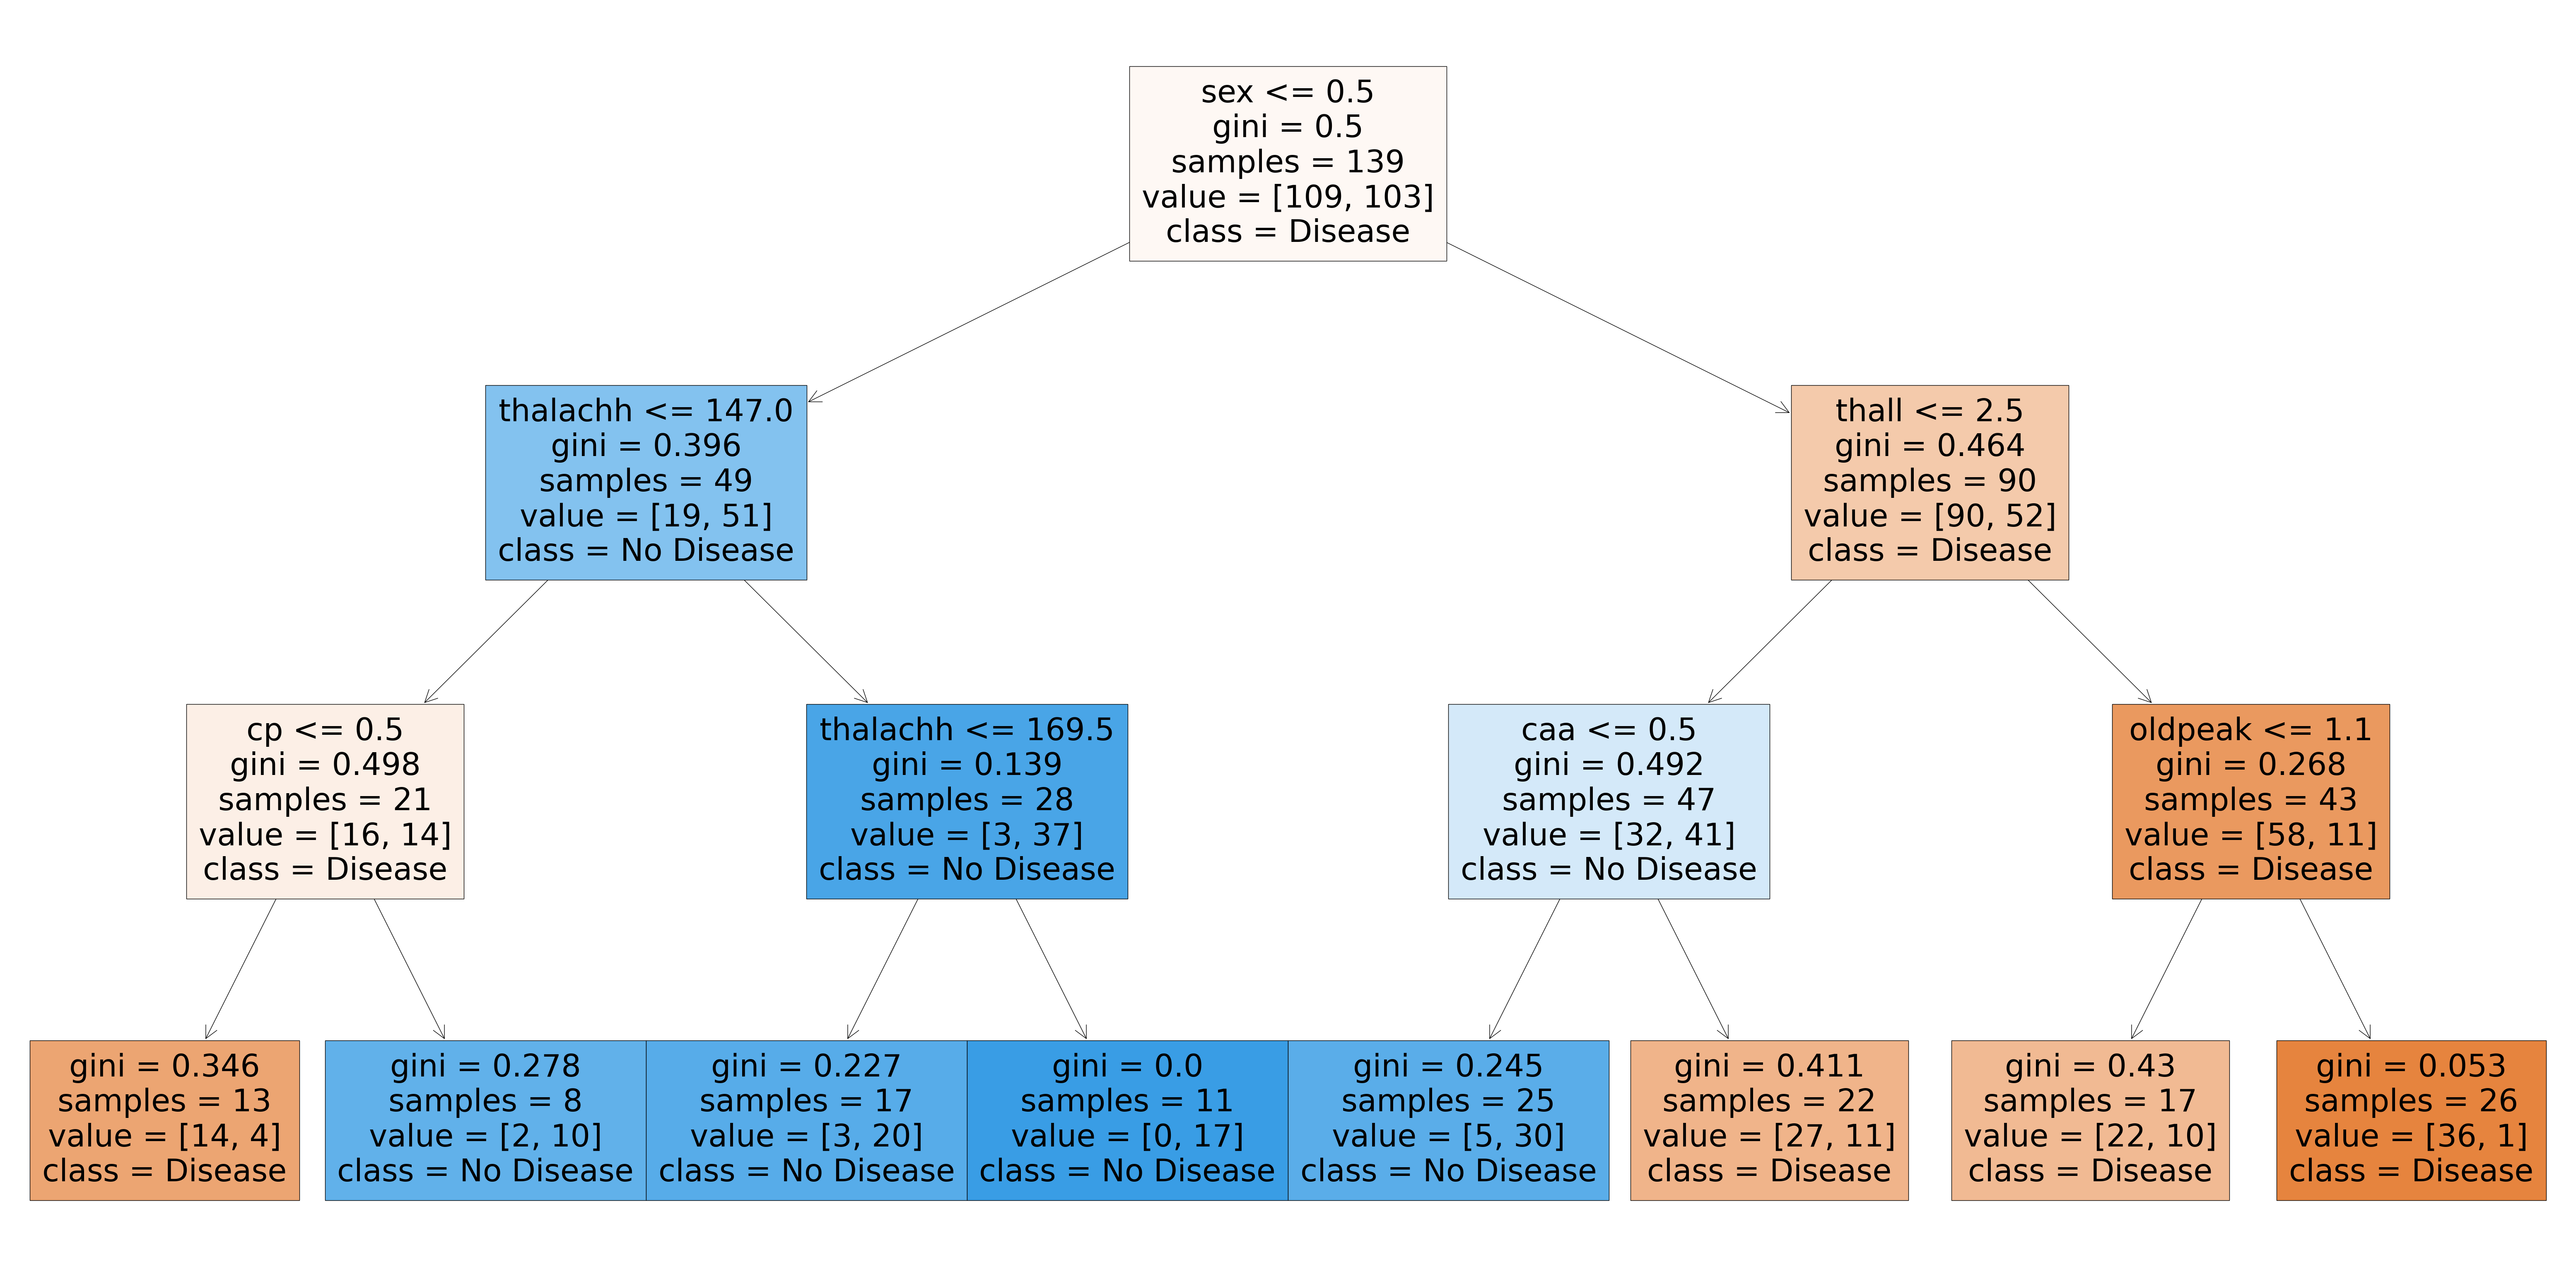

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],feature_names=x.columns.tolist(),class_names=['Disease','No Disease'],filled=True);

### sort the data with the help of feature importance

In [16]:
rf_best.feature_importances_

array([0.02710122, 0.04878956, 0.18393793, 0.02133891, 0.01571649,
       0.0013147 , 0.00243355, 0.12137129, 0.14267091, 0.1006341 ,
       0.04693598, 0.16628463, 0.12147071])

In [17]:
imp_df=pd.DataFrame({
    'Varname':x_train.columns,
    'Imp':rf_best.feature_importances_
})
imp_df.sort_values(by='Imp',ascending=False)

,Varname,Imp
2,cp,0.183938
11,caa,0.166285
8,exng,0.142671
12,thall,0.121471
7,thalachh,0.121371
9,oldpeak,0.100634
1,sex,0.048790
10,slp,0.046936
0,age,0.027101
3,trtbps,0.021339


In [18]:
import joblib
joblib.dump(rf,'rf_model1.joblib')

['rf_model1.joblib']